# Pymaceuticals Inc.
---

### Analysis

bargraph
#Capomulin has the most # of observed timepoints. This indicates the variability of each drug differ with the Capo and Rami
#mean that the frequency of the drug is much more effective than the other drugs

piegraph
#total male and female population is similar with female mice population slightly more than male (53% vs 49%)
boxplot
#Capomulin and Ramicane has the smallest tumor size compared to infubunil and Ceftamin. The single outlier in the data 
#needs more investingation. The outlier tumor size is 36mm, much snaller than the rest of its group
line chart
#Here you can see that the tumor size for Capomulin on mice is very effective. The size of the tumor shows a noticeable drop from 
#the beginning starting at 45mm down to 39.
- #scatterplot shows a positive trend indicating the bigger the mouse the bigger the average tumor size is. 
 

In [1]:
pwd

'C:\\Users\\kevin\\OneDrive\\Documents\\Module5Challenge'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(f'Mouse Data: {mouse_metadata.columns}')
print(f'Study Data: {study_results.columns}')
mousestudydata = pd.merge(study_results, mouse_metadata, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
mousestudydata.head()

#index numbers do not match Lina

Mouse Data: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Study Data: Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
TotalMicePopulation = len(mousestudydata['Mouse ID'].unique())
TotalMicePopulation

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mousestudydata[mousestudydata.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_mice = duplicate_rows['Mouse ID'].unique()

duplicate_mice 


array(['g989'], dtype=object)

In [5]:
duplicatemiceDF = mousestudydata.loc[mousestudydata['Mouse ID'] == 'g989'].sort_values(['Timepoint'],ascending = True)
duplicatemiceDF = duplicatemiceDF[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
duplicatemiceDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_duplicateDF = mousestudydata.loc[mousestudydata['Mouse ID'] != 'g989']
dropped_duplicateDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
TotalMicePopulationCleaned = len(dropped_duplicateDF['Mouse ID'].unique())
TotalMicePopulationCleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


groupedDFbyMeanTumor = dropped_duplicateDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
groupedDFbyMedianTumor = dropped_duplicateDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
groupedDFbyVolVarianceTumor = dropped_duplicateDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
groupedDFbyStdDevTumor = dropped_duplicateDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
groupedDFbySEMTumor = dropped_duplicateDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
TestDF = pd.DataFrame({
'Mean Tumor Volume': groupedDFbyMeanTumor,
'Median Tumor Volume': groupedDFbyMedianTumor,
'Tumor Volume Variance': groupedDFbyVolVarianceTumor,
'Tumor Volume Std. Dev.': groupedDFbyStdDevTumor,
'Tumor volume Std. Err.': groupedDFbySEMTumor
})
TestDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
AggregateDF = dropped_duplicateDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
AggregateDF
#how do I get the Tumor Volume (mm3) to appear on upper right side? Lina

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#justdrugandcount = dropped_duplicateDF.loc[(dropped_duplicateDF['Drug Regimen']) ]
justdrugandcount = dropped_duplicateDF.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending = False).reset_index()
justdrugandcount

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


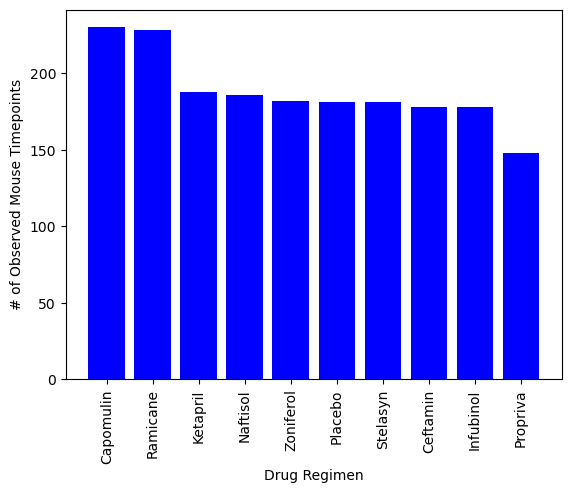

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen = justdrugandcount['Drug Regimen']
count = justdrugandcount['Timepoint']
plt.bar(drug_regimen, count, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

#why does the number of observed timepoints differ? Capomulin has the most # of observed timepoints probably 
#mean that the frequency of the drug is much more effective than the other drugs

Text(0, 0.5, 'Sex')

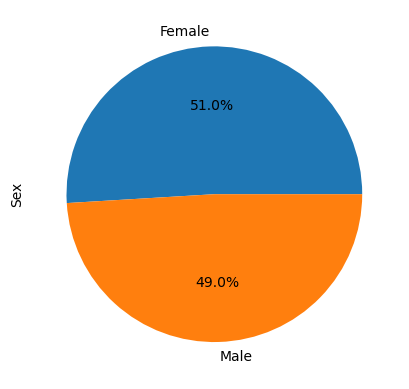

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gendermiceDF = dropped_duplicateDF['Sex'].value_counts()
label = dropped_duplicateDF['Sex'].unique()

plt.pie(gendermiceDF,autopct="%1.1f%%", startangle=0, labels = label)
plt.ylabel('Sex') 

#total male and female population is similar with female mice population slightly more than male (53% vs 49%)

<Axes: ylabel='count'>

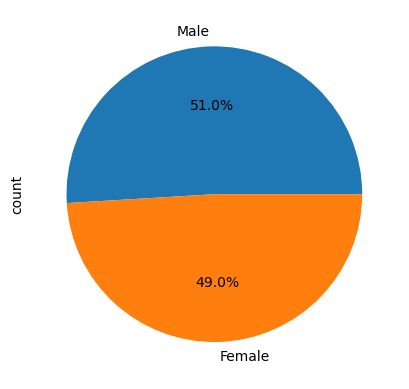

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#malemicecount = gendermiceDF.loc[gendermiceDF['Sex'] == 'Male']
#femalemicecount = gendermiceDF.loc[gendermiceDF['Sex'] == 'Female']
gendermiceDF.plot(kind = 'pie', y = 'Sex', autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_miceDF = dropped_duplicateDF.loc[(dropped_duplicateDF['Drug Regimen'] == 'Capomulin') | \
                                             (dropped_duplicateDF['Drug Regimen'] == 'Ramicane') | \
                                             (dropped_duplicateDF['Drug Regimen'] == 'Infubinol') | \
                                             (dropped_duplicateDF['Drug Regimen'] == 'Ceftamin')
                                            ]
#final_tumor_miceDF2 = final_tumor_miceDF.drop(columns={'Metastatic Sites','Sex','Age_months','Weight (g)'})
#final_tumor_miceDF2


#test = final_tumor_miceDF.loc[(final_tumor_miceDF(['Mouse ID']) & (final_tumor_miceDF(['Timepoint'])))]
#test

#MouseIDgroup = dropped_duplicateDF['Mouse ID']
#TimepointGroup = dropped_duplicateDF['Timepoint']
#MiceDataframe = pd.DataFrame({ 
#    'Mean Tumor Volume': groupedDFbyMeanTumor,
#       'Timepoint'     : TimepointGroup       
#})
#MiceDataframe    

#testing = final_tumor_miceDF.groupby(['Mouse ID'])['Timepoint'].max()
#testing  DF 


#get the largest tumor volume by the mouse ID. Filter to get the mouse ID and 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volumes = final_tumor_miceDF.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
merged_mice_df = pd.merge(final_tumor_miceDF, final_tumor_volumes, on=['Mouse ID', 'Timepoint'], how='inner')
merged_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [16]:
# Put treatments into a list for loop (and later for plot labels)
treatments = list(merged_mice_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

quartiles = merged_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    iqr = quartiles[treatment][0.75] - quartiles[treatment][0.25]
    lower_bound = quartiles[treatment][0.25] - 1.5 * iqr
    upper_bound = quartiles[treatment][0.75] + 1.5 * iqr
    outliers = merged_mice_df.loc[(merged_mice_df['Drug Regimen'] == treatment) & \
                                 ((merged_mice_df['Tumor Volume (mm3)'] < lower_bound) | \
                                  (merged_mice_df['Tumor Volume (mm3)'] > upper_bound))]
    print(f"{treatment}'s potential outliers:{outliers['Tumor Volume (mm3)']}")

#infubinol has only one mouse as an outlier in the the data with the tumor size much of the single mouse much lower.
#More data is needed to understand why the outlier has a significantly smaller tumor than any other. 

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


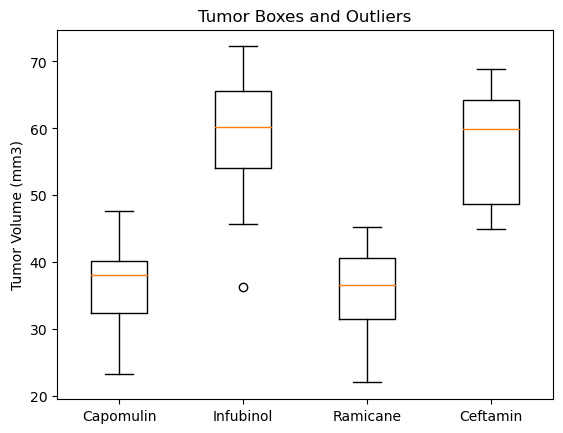

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatmentloopslist = []
quartilelist=[]
for treatment in treatments:
    # Filter the data for the current treatment
    filtereddf = merged_mice_df.loc[merged_mice_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the current treatment
    tumorvolumecurrentdf = filtereddf['Tumor Volume (mm3)']
    quartiletumorvol = filtereddf['Tumor Volume (mm3)'].quantile([.25,.5,.75])

        #tumor_volume_data = treatment_data['Tumor Volume']
    treatmentloopslist.append(filtereddf['Tumor Volume (mm3)'])
    quartilelist.append(filtereddf['Tumor Volume (mm3)'].quantile([.25,.5,.75]))
    
    # Create a plot for the current treatment
fig1, ax1 = plt.subplots()
ax1.boxplot(treatmentloopslist)
ax1.set_title('Tumor Boxes and Outliers')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
plt.show()
    

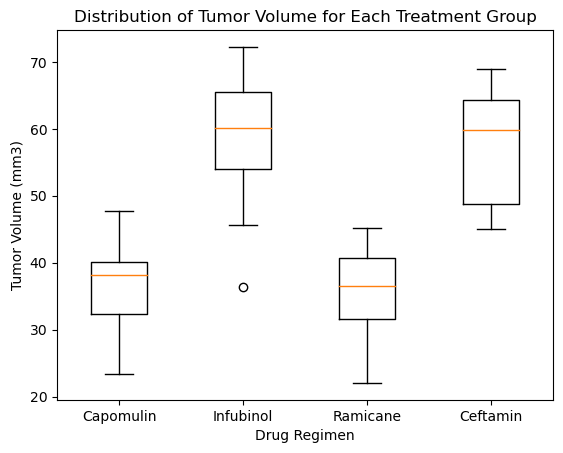

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [merged_mice_df.loc[merged_mice_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]


plt.boxplot(tumor_vol_data, labels=treatments)


plt.xlabel('Drug Regimen')


plt.ylabel('Tumor Volume (mm3)')


plt.title('Distribution of Tumor Volume for Each Treatment Group')


plt.show()

#Capomulin and Ramicane has the smallest tumor size compared to infubunil and Ceftamin. The single outlier in the data 
#needs more investingation. The outlier tumor size is 36mm, much snaller than the rest of its group

## Line and Scatter Plots

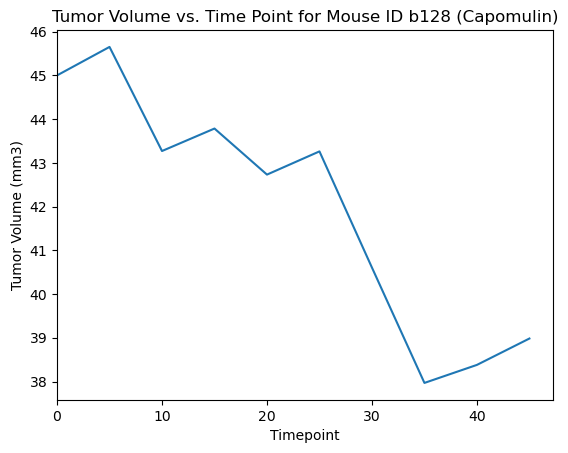

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [19]:
# Filter the data for Capomulin
capomulin_data = dropped_duplicateDF.loc[dropped_duplicateDF['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse (e.g., mouse ID 'b128')
mouse_id = 'b128'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')
plt.xlim(mouse_data['Timepoint'].min())

plt.show()
mouse_data

#Here you can see that the tumor size for Capomulin on mice is very effective. The size of the tumor shows a noticeable drop from 
#the beginning starting at 45mm down to 39.

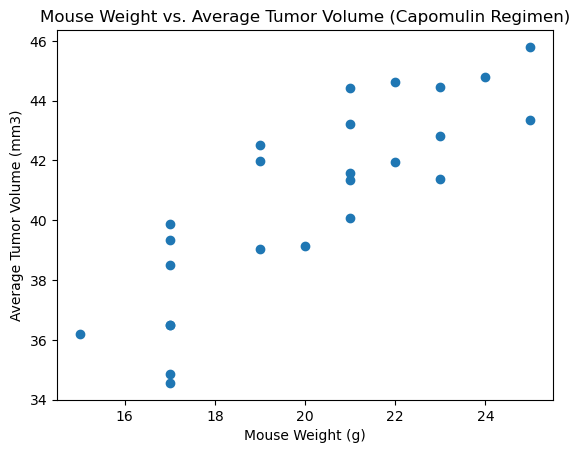

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()


## Correlation and Regression


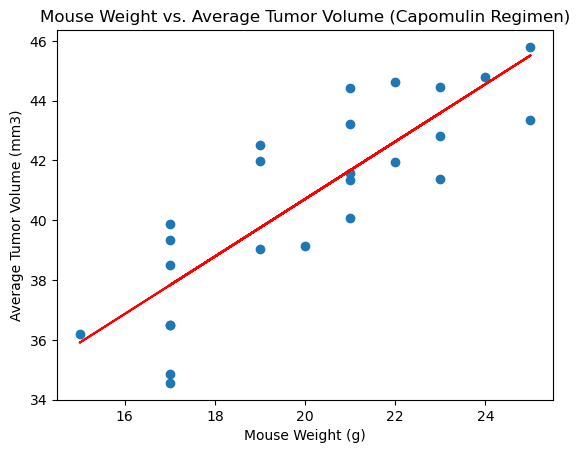

In [25]:
# Calculate the correlation coefficient and a linear regression model 
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
y_intercept = intercept

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')



plt.plot(mouse_weights, slope * mouse_weights + y_intercept, color='red')

plt.show()
#scatterplot shows a positive trend indicating the bigger the mouse the bigger the average tumor size is. 